## Functional Tests for Suftware
Skeleton code on which functional tests are performed

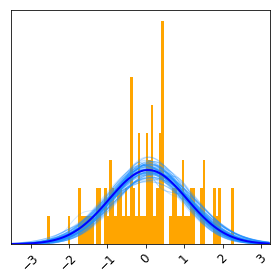

In [1]:
# Standard modules
import numpy as np
import sys

# Import suftware 
sys.path.append('../../')
import suftware as sw

# Generate datas
np.random.seed(0)
data = np.random.randn(100)

# simple test
sw.Density(data).plot() 
global_mistake = False
global_test_counter = 0

# helper method for functional test
def run_one_functional_test(**kw):
    
    functional_test = sw.Density(data,**kw)
    global global_mistake
    global_mistake = functional_test.mistake
    if global_mistake is True:
        display_status()
        sys.exit(1)
    global global_test_counter   
    global_test_counter+=1

# helper method for displaying pass/fail status
def display_status():
    if(global_mistake):
        get_ipython().run_cell_magic(u'HTML', u'', u'<font size=6 color=red><b>FAIL</b></font>')
    else:
        get_ipython().run_cell_magic(u'HTML', u'', u'<font size=6 color=green><b>PASS</b></font>')

## grid Tests:

In [2]:
# values to be tested that are expected to fail
grid_fail_list = [
    5,
    'x',
    set(np.linspace(-3,3,100)),
    np.linspace(-3,3,5),
    np.linspace(-3,3,1001),
    np.linspace(-1E-6,1E-6,100),
    np.linspace(-1E6,1E6,100)
]

# values to be tested that are expected to pass
grid_success_list = [
    None,
    np.linspace(-3,3,100),
    np.linspace(-3,3,100).T,
    np.matrix(np.linspace(-3,3,100)),
    np.matrix(np.linspace(-3,3,100).T),
    list(np.linspace(-3,3,100)),
    np.linspace(-3,3,6),
    np.linspace(-3,3,100),
    np.linspace(-3,3,100),
    np.linspace(-3,3,1000)
]  
    
# should fail    
[run_one_functional_test(grid=grid_fail_list[i],should_fail=True) for i in range(len(grid_fail_list))]
# should pass
[run_one_functional_test(grid=grid_success_list[i],should_fail=False) for i in range(len(grid_success_list))]
    

display_status()

Error, as expected: type(grid) = <class 'int'>; must be a list or np.ndarray
Error, as expected: type(grid) = <class 'str'>; must be a list or np.ndarray
Error, as expected: type(grid) = <class 'set'>; must be a list or np.ndarray
Error, as expected: len(grid) = 5; must have 6 <= len(grid) <= 1000.
Error, as expected: len(grid) = 1001; must have 6 <= len(grid) <= 1000.
Error, as expected: Histogram has 0 nonempty bins; must be > 3.
Error, as expected: Histogram has 2 nonempty bins; must be > 3.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.


## grid_spacing Tests

In [3]:
# values to be tested
grid_spacing_fail_list = [0,0.0,-0.1,'0.1',[0.1],0.0001,1000.0]
grid_spacing_success_list = [None,0.02,0.1,0.5]

# should fail    
[run_one_functional_test(grid_spacing=grid_spacing_fail_list[i],should_fail=True) for i in range(len(grid_spacing_fail_list))]
# should pass
[run_one_functional_test(grid_spacing=grid_spacing_success_list[i],should_fail=False) for i in range(len(grid_spacing_success_list))]
    
display_status()    

Error, as expected: grid_spacing = 0.000000; must be > 0.
Error, as expected: grid_spacing = 0.000000; must be > 0.
Error, as expected: grid_spacing = -0.100000; must be > 0.
Error, as expected: type(grid_spacing) = <class 'str'>; must be a number
Error, as expected: type(grid_spacing) = <class 'list'>; must be a number
Error, as expected: Using grid_spacing = 0.000100 produces num_grid_points = 67518, which is too big. Increase grid_spacing or do not set.
Error, as expected: Using grid_spacing = 1000.000000 produces num_grid_points = 0, which is too small. Reduce grid_spacing or do not set.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.


## bounding_box Tests:

In [4]:
# bounding_box

# values to be tested
bbox_fail_list = [{-6, 6},6,[6],[-6, 0, 6],['-6', '6'],[6, 6],[-1E-6, 1E-6],[-1E6, 1E6],[10, 20]]
bbox_success_list = [[-6, 6],(-6, 6),np.array([-6, 6]),[-.1, .1],[-10, 10]]

# should fail    
[run_one_functional_test(bounding_box=bbox_fail_list[i],should_fail=True) for i in range(len(bbox_fail_list))]
# should pass
[run_one_functional_test(bounding_box=bbox_success_list[i],should_fail=False) for i in range(len(bbox_success_list))]

display_status()

Error, as expected: type(bounding_box) = <class 'set'>; must be one of (<class 'list'>, <class 'tuple'>, <class 'numpy.ndarray'>)
Error, as expected: type(bounding_box) = <class 'int'>; must be one of (<class 'list'>, <class 'tuple'>, <class 'numpy.ndarray'>)
Error, as expected: len(bounding_box) = 1; must be 2
Error, as expected: len(bounding_box) = 3; must be 2
Error, as expected: bounding_box = ['-6', '6']; entries must be numbers
Error, as expected: bounding_box = [6, 6]; entries must be sorted
Error, as expected: Histogram has 0 nonempty bins; must be > 3.
Error, as expected: Histogram has 2 nonempty bins; must be > 3.
Error, as expected: Histogram has 0 nonempty bins; must be > 3.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.


## num_grid_points Tests

In [5]:
# num_grid_points

num_grid_points_fail_list = [-10,-1,0,1,2,3,4,5,1001] 
num_grid_points_success_list = [6,100,1000]

# should fail    
[run_one_functional_test(num_grid_points=num_grid_points_fail_list[i],should_fail=True) for i in range(len(num_grid_points_fail_list))]
# should pass
[run_one_functional_test(num_grid_points=num_grid_points_success_list[i],should_fail=False) for i in range(len(num_grid_points_success_list))]

display_status()


Error, as expected: num_grid_points = -10; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = -1; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 0; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 1; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 2; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 3; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 4; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 5; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 1001; must have 6 <= num_grid_poitns <= 1000.
Success, as expected.
Success, as expected.
Success, as expected.


## alpha Tests

In [6]:
# alpha

# values to be tested
alpha_fail_list = [None,'x',-1,0.0,0,0.1,10]
alpha_success_list = [1,2,3,4]

# should fail    
[run_one_functional_test(alpha=alpha_fail_list[i],should_fail=True) for i in range(len(alpha_fail_list))]
# should pass
[run_one_functional_test(alpha=alpha_success_list[i],should_fail=False) for i in range(len(alpha_success_list))]

display_status()

Error, as expected: type(alpha) = <class 'NoneType'>; must be int.
Error, as expected: type(alpha) = <class 'str'>; must be int.
Error, as expected: alpha = -1; must have 1 <= alpha <= 4
Error, as expected: type(alpha) = <class 'float'>; must be int.
Error, as expected: alpha = 0; must have 1 <= alpha <= 4
Error, as expected: type(alpha) = <class 'float'>; must be int.
Error, as expected: alpha = 10; must have 1 <= alpha <= 4
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.


## periodic Tests

In [7]:
# periodic 

# values to be tested
periodic_fail_list = [0,-1,'True','x',1]
perdiodic_success_list = [False,True]

# should fail    
[run_one_functional_test(periodic=periodic_fail_list[i],should_fail=True) for i in range(len(periodic_fail_list))]
# should pass
[run_one_functional_test(periodic=perdiodic_success_list[i],should_fail=False) for i in range(len(perdiodic_success_list))]

display_status()

Error, as expected: type(periodic) = <class 'int'>; must be bool
Error, as expected: type(periodic) = <class 'int'>; must be bool
Error, as expected: type(periodic) = <class 'str'>; must be bool
Error, as expected: type(periodic) = <class 'str'>; must be bool
Error, as expected: type(periodic) = <class 'int'>; must be bool
Success, as expected.
Success, as expected.


## Z_evaluation_method Tests

In [8]:
# Z_evaluation_method

# values to be tested
Z_eval_fail_list = [0,'x','Einstein',False]
Z_eval_success_list = ['Lap','Lap+Fey','Lap+Imp']

# should fail    
[run_one_functional_test(Z_evaluation_method=Z_eval_fail_list[i],should_fail=True) for i in range(len(Z_eval_fail_list))]
# should pass
[run_one_functional_test(Z_evaluation_method=Z_eval_success_list[i],should_fail=False) for i in range(len(Z_eval_success_list))]

display_status()


Error, as expected: Z_eval = 0; must be in ['Lap', 'Lap+Imp', 'Lap+Fey']
Error, as expected: Z_eval = x; must be in ['Lap', 'Lap+Imp', 'Lap+Fey']
Error, as expected: Z_eval = Einstein; must be in ['Lap', 'Lap+Imp', 'Lap+Fey']
Error, as expected: Z_eval = False; must be in ['Lap', 'Lap+Imp', 'Lap+Fey']
Success, as expected.
Success, as expected.
Success, as expected.


## num_samples_for_Z Tests

In [13]:
# num_samples_for_Z

# Question: should a value of None pass or fail?

# values to be tested
num_samples_for_Z_fail_list = [None,-1,'x',0.1,1e5]
num_samples_for_Z_success_list =  [1,10,1000] 

# should fail    
[run_one_functional_test(num_samples_for_Z=num_samples_for_Z_fail_list[i],should_fail=True) for i in range(len(num_samples_for_Z_fail_list))]
# should pass
[run_one_functional_test(num_samples_for_Z=num_samples_for_Z_success_list[i],should_fail=False) for i in range(len(num_samples_for_Z_success_list))]

display_status()

MISTAKE: Succeeded but should have failed.


SystemExit: 1

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Total Number of Functional Tests Run:

In [9]:
global_test_counter

79